<a href="https://colab.research.google.com/github/trDalmi/Machine-Learning/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Also called as Z-score Normalization.

In [1]:
import numpy as np  # linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
193,19,70000,0
380,42,64000,0
54,27,58000,0
283,52,21000,1
385,56,60000,1


Train test split.

In [6]:
#shuffle_df = df.sample(frac=1)

# Define a size for your train set
#train_size = int(0.7 * len(df))

# Split your dataset
#train_set = shuffle_df[:train_size]
#test_set = shuffle_df[train_size:]

In [7]:
#X_train = train_set.iloc[:,:-1].values
#y_train = train_set.iloc[:,-1].values

#X_test = test_set.iloc[:,:-1].values
#y_test = test_set.iloc[:,-1].values

In [49]:
#X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
#X_test = pd.DataFrame(X_test, columns=df.columns[:-1])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.2, random_state=42)

Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it willlearn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#by using the training set's mean and standard deviation for both transformations, we ensure a fair and
#realistic evaluation of the model's performance on unseen data and prevent data leakage, which could lead to misleading results.
# Jo model hoga apna woh scaled values hi padh rha hoga mtlb usko new data bhi scale krna pdega
# and uske liye uspe kuch mean and sd nhi hoga intially coz we dont know the distribution so, we use the sd ad mean of the
# training data.

In [51]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [52]:
X_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [53]:
X_train_scaled

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

The data after scaling is in nparray format so converting it into dataframe.

In [54]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [55]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.9,70281.2
std,10.2,34430.6
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [56]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


Effect of scaling on the data distribution.

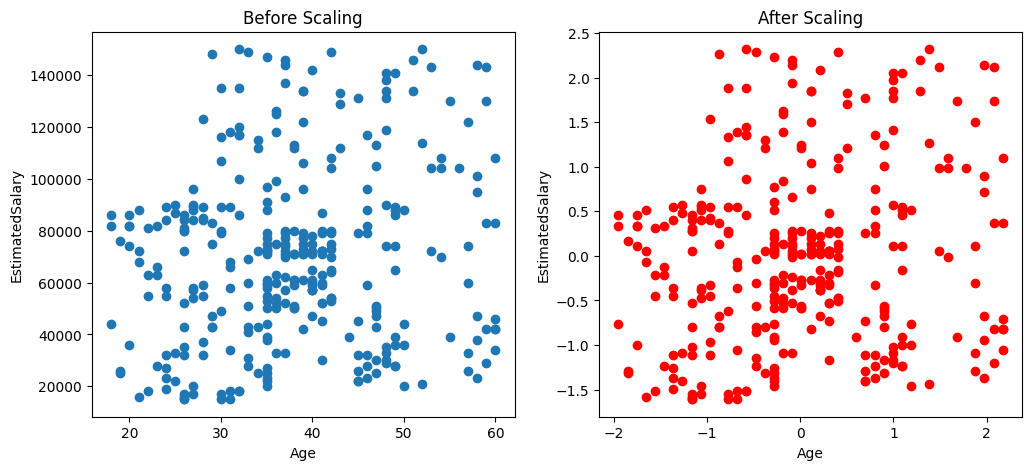

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
ax2.set_title('After Scaling')

plt.show()

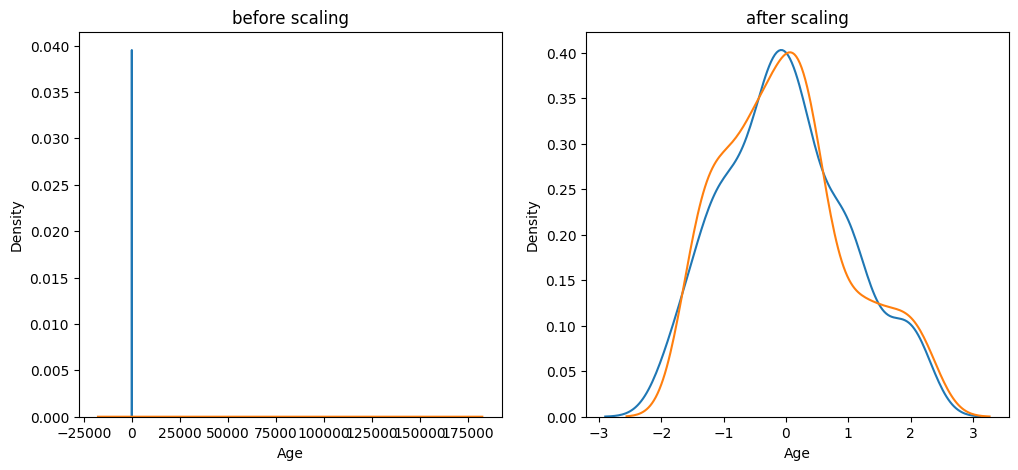

In [58]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("before scaling")
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled['Age'],ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)

plt.show()

Why is scaling important??

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [64]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [66]:
from sklearn.metrics import accuracy_score

In [67]:
print("Accuracy before scaling", accuracy_score(y_test,y_pred))
print("Accuracy after scaling", accuracy_score(y_test,y_pred_scaled))

Accuracy before scaling 0.8875
Accuracy after scaling 0.8625


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [70]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [71]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [72]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8375
Scaled 0.8375


Scaling does not have any effect on the outliers, we still have to deal with them explicitly